## Disney Movies and Box Office Success

Walt Disney Studios is the foundation on which The Walt Disney Company was built. The Studios has produced more than 600 films since their debut film, Snow White and the Seven Dwarfs in 1937. While many of its films were big hits, some of them were not. In this notebook, we will explore a dataset of Disney movies and analyze what contributes to the success of Disney movies.

<img src="https://i.imgur.com/DBksl99.jpg" alt="Walt Disney Studios Logo" title="Walt Disney Studios Logo" width="400">

First, we will take a look at the [Disney data](https://data.world/kgarrett/disney-character-success-00-16). The dataset contains data of `579 Disney movies released between 1937-2016` with six features: 
- `movie_title` - The title of the movie
- `release_date` - The date of release of the movie
- `genre` - The genre (or kind) of the movie
- `mpaa_rating` - The rating given for the movie by the Motion Picture Association of America (MPAA) film rating system
- `total_gross` - All earnings of the movie from all revenue sources, including box office.
- `inflation_adjusted_gross` - Earnings after removing the effect of price inflation from data

**Important terms:**

**Gross**: 
- *Gross* / *Gross box office* collection is the total collection of any movie from tickets i.e., the collective sum of the ticket value sold at the counter.

**Net**: 
- *Net* / *Net box office* collection refers to the amount which comes after deducting Tax by any state government i.e., the gross collection, minus the entertainment tax.

**Inflation Adjusted**:
- In economics, inflation is a sustained increase in the general price level of goods and services in an economy over a period of time.
- The opposite of inflation is deflation, a sustained decrease in the general price level of goods and services.
- Inflation adjustment or deflation is the process of removing the effect of price inflation from data.
- Inflation is a way to measure how much prices increase by over time. Therefore, if annual inflation is 2%, something that cost you £1 a year ago will cost you £1.02 today.
- INFLATION ADJUSTMENT is whenever any figure is adjusted for inflation/deflation. It simply means that all fluctuations in price (upward or downward) that are directly attributable to inflation/deflation are reflected into that figure through either adding or subtracting the amount that is directly caused by inflation/deflation.

**Motion Picture Association of America (MPAA) Ratings**:
- **G** - General Audiences (All Ages Admitted)
- **PG** - Parental Guidance Suggested (Some Material May Not Be Suitable for Children)
- **PG-13** - Parents Strongly Cautioned (Some Material May Not Be Suitable for Children Under 13)
- **R** - Restricted (Under 17 Not Admitted Without An Adult)
- **NC-17** - No Children Under 17 Admitted

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 800)

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

**Load Data**

In [2]:
movie_df = pd.read_csv('disney_movies_total_gross.csv')
print('Dataset loaded.')
movie_df.head()

Dataset loaded.


,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [3]:
print('The dataset has {} rows and {} columns'.format(*movie_df.shape))

The dataset has 579 rows and 6 columns


In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
movie_title                 579 non-null object
release_date                579 non-null object
genre                       562 non-null object
mpaa_rating                 523 non-null object
total_gross                 579 non-null int64
inflation_adjusted_gross    579 non-null int64
dtypes: int64(2), object(4)
memory usage: 27.2+ KB


In [5]:
movie_df.isnull().any()

movie_title                 False
release_date                False
genre                       True 
mpaa_rating                 True 
total_gross                 False
inflation_adjusted_gross    False
dtype: bool

Let's convert the inflation_adjusted_gross values to a much more readable form

In [6]:
movie_df['adjusted_gross_millions'] = movie_df['inflation_adjusted_gross'] / 1000000
movie_df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,adjusted_gross_millions
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,5228.953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,2188.229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,2187.090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1078.510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,920.608730


**Top Ten Movies at the Box Office**

Let's started by exploring the data. We will check which are the 10 Disney movies that have earned the most at the box office. We can do this by sorting movies by their inflation-adjusted gross (we will call it adjusted gross from this point onward).

In [7]:
top_ten_high_grossing_movies = movie_df.sort_values(by='inflation_adjusted_gross', ascending=False)
top_ten_high_grossing_movies.head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,adjusted_gross_millions
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,5228.953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,2188.229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,2187.090808
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985,1362.870985
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515,1236.035515
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1078.510579
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225,936.662225
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,920.608730
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346,789.612346
179,The Lion King,1994-06-15,Adventure,G,422780140,761640898,761.640898


Let's find out which are some of the famous genres in the top 10 movies list.

In [8]:
top_genres = pd.Series(data=top_ten_high_grossing_movies['genre'].head(10))
top_genres.value_counts()

Adventure    4
Musical      3
Drama        2
Comedy       1
Name: genre, dtype: int64

We have 4 movies from the `Adventure` genre, 3 from the `Musical`, 2 from `Drama` and 1 from the `Comedy` genre in the top 10 movies list.

**Movie Genre Trend**

We will check which genres are growing stronger in popularity. To do this, let's first find the number of movies per genre and then look at thier respective adjusted gross values.

In [9]:
genre_counts = movie_df['genre'].value_counts().to_frame().rename(columns={'genre':'count'})
genre_counts

,count
Comedy,182
Adventure,129
Drama,114
Action,40
Thriller/Suspense,24
Romantic Comedy,23
Documentary,16
Musical,16
Western,7
Horror,6


<BarContainer object of 12 artists>

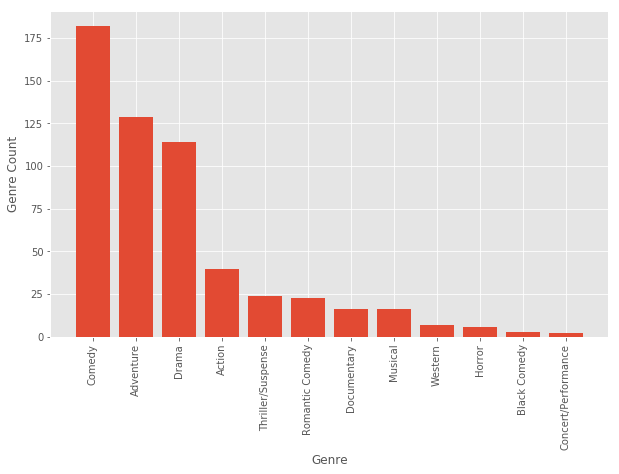

In [10]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Genre Count')
plt.bar(genre_counts.index, genre_counts['count'])

We observe that the `Comedy`, `Adventure` and `Drama` movie genres dominate over the other genres. Next we'll analyze these 3 movie genres. 

We'll now group the data by the genre of the movie, and then analyze movies from each genre

In [11]:
movie_df['release_year'] = pd.DatetimeIndex(movie_df['release_date']).year
movie_df['release_year'].astype(int)
genre_group = movie_df.groupby('genre')

***Comedy Genre***

In [12]:
comedy_df = genre_group.get_group('Comedy')
comedy_df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,adjusted_gross_millions,release_year
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985,1362.870985,1961
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574,310.094574,1961
11,Bon Voyage!,1962-05-17,Comedy,Not Rated,9230769,109581646,109.581646,1962
14,Blackbeard's Ghost,1968-02-08,Comedy,NaN,21540050,138612686,138.612686,1968
16,The Boatniks,1970-07-01,Comedy,NaN,18607492,101200742,101.200742,1970
18,The Apple Dumpling Gang,1975-07-01,Comedy,NaN,31916500,131246872,131.246872,1975
19,Freaky Friday,1977-01-21,Comedy,NaN,25942000,98067733,98.067733,1977
28,The Fox and the Hound,1981-07-10,Comedy,NaN,43899231,133118889,133.118889,1981
33,Trenchcoat,1983-03-11,Comedy,NaN,4304286,11519089,11.519089,1983
37,Splash,1984-03-09,Comedy,PG,62599495,157057661,157.057661,1984


Total number of comedy movies

In [13]:
len(comedy_df)

182

Next we'll group our comedy data by `release_year` and then find which year has the movies with the highest adjusted gross values.

In [14]:
#genre_group = movie_df.groupby(['genre','release_year'])
#action_df = genre_group.get_group(('Comedy',1988))
#action_df
comedy_movie_counts = comedy_df['release_year'].value_counts().to_frame().reset_index(drop=False).rename(columns={'index':'release_year','release_year':'num_of_comedy_movies'}).sort_values(by='release_year',ascending=True)
comedy_movie_counts

,release_year,num_of_comedy_movies
26,1961,2
38,1962,1
37,1968,1
36,1970,1
35,1975,1
34,1977,1
33,1981,1
32,1983,1
31,1984,1
30,1985,1


Let's now find out the types of MPAA ratings given to the comedy movies and their counts 

In [15]:
comedy_movie_rating_count = comedy_df['mpaa_rating'].value_counts().to_frame().reset_index(drop=False).rename(columns={'index':'mpaa_rating','mpaa_rating':'count'})
comedy_movie_rating_count

,mpaa_rating,count
0,PG,77
1,PG-13,37
2,R,30
3,G,17
4,Not Rated,1


From the above dataframe, on summing up the counts column we get 162, but recall that we have a total of 182 comedy movies. On observing the `mpaa_rating` column of the dataframe you can see that some movies do not have a valid rating or have NaN.

In [16]:
# Get total number of NaN values in 'mpaa_rating' column of the dataset
comedy_movie_rating_nan = comedy_df['mpaa_rating'].isna().sum()
# Adding a row to the end of the dataframe
comedy_movie_rating_count.loc[len(comedy_movie_rating_count.index)] = ['NaN',comedy_movie_rating_nan]
comedy_movie_rating_count

,mpaa_rating,count
0,PG,77
1,PG-13,37
2,R,30
3,G,17
4,Not Rated,1
5,NaN,20


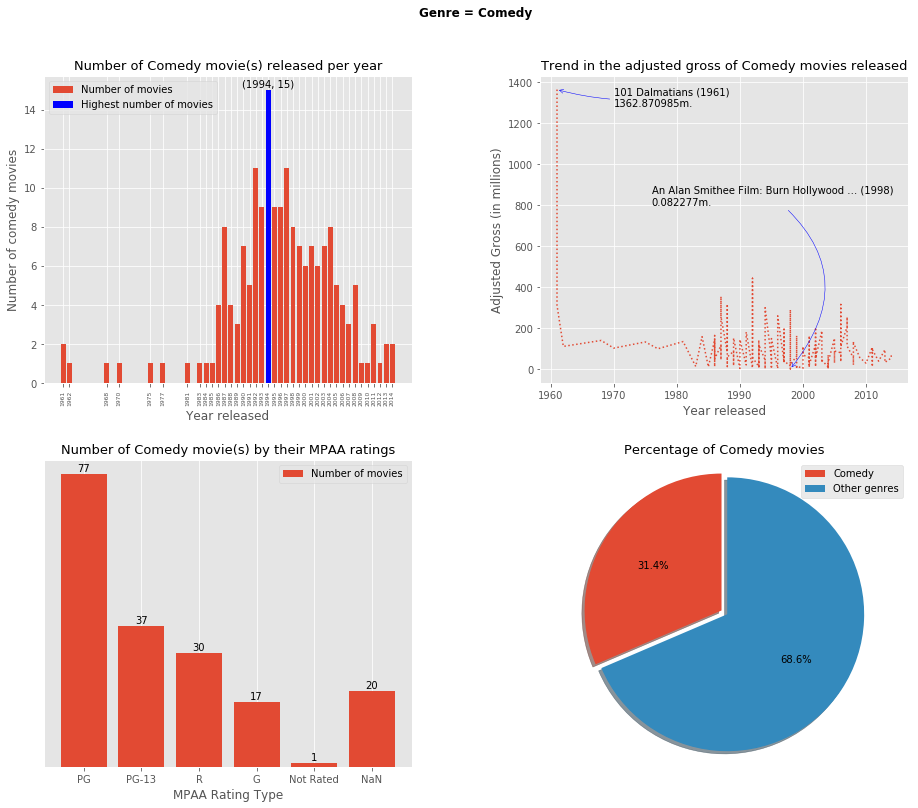

In [17]:
plt.figure(figsize=(20,12))

# 2x2 grid | plot 1
plt.subplot(221)
#clrs = ['crimson' if (count < max(comedy_movie_counts['num_of_comedy_movies'])) else 'blue' for count in comedy_movie_counts['num_of_comedy_movies'] ]
label = ['Number of movies','Highest number of movies']
plt.bar(comedy_movie_counts['release_year'], comedy_movie_counts['num_of_comedy_movies'])
index_max = comedy_movie_counts['num_of_comedy_movies'].idxmax()
plt.bar(comedy_movie_counts.at[index_max, 'release_year'], comedy_movie_counts.at[index_max, 'num_of_comedy_movies'], color='blue')
plt.xlabel('Year released')  
plt.ylabel('Number of comedy movies')
plt.legend(label, loc=2, shadow=False)
plt.xticks(comedy_movie_counts['release_year'], rotation=90, fontsize=6)
# annotations
annotation_format = '({}, {})'.format(comedy_movie_counts.at[index_max, 'release_year'], comedy_movie_counts.at[index_max, 'num_of_comedy_movies'])
plt.annotate(annotation_format, 
             (comedy_movie_counts.at[index_max, 'release_year'], comedy_movie_counts.at[index_max, 'num_of_comedy_movies']), 
             textcoords="offset points", 
             xytext=(0,3), 
             ha='center')
plt.title('Number of Comedy movie(s) released per year', fontsize=13)

# 2x2 grid | plot 2
plt.subplot(222)
plt.plot(comedy_df['release_year'], comedy_df['adjusted_gross_millions'], ':')
plt.xlabel('Year released')  
plt.ylabel('Adjusted Gross (in millions)')
index_max = comedy_df['adjusted_gross_millions'].idxmax()
index_min = comedy_df['adjusted_gross_millions'].idxmin()
# annotations
annotation_max = '{} ({})\n{}m.'.format(comedy_df.at[index_max,'movie_title'],comedy_df.at[index_max,'release_year'],comedy_df.at[index_max, 'adjusted_gross_millions'])
annotation_min = '{} ({})\n{}m.'.format(comedy_df.at[index_min,'movie_title'],comedy_df.at[index_min,'release_year'],comedy_df.at[index_min, 'adjusted_gross_millions'])
plt.annotate(annotation_max,
             xy=(comedy_df.at[index_max,'release_year'],comedy_df.at[index_max, 'adjusted_gross_millions']),
             xytext=(1970,1280),
             arrowprops=dict(arrowstyle='->',color="blue",connectionstyle='arc3,rad=-0.1'))
plt.annotate(annotation_min,
             xy=(comedy_df.at[index_min,'release_year'],comedy_df.at[index_min, 'adjusted_gross_millions']),
             xytext=(1976,800),
             arrowprops=dict(arrowstyle='->',color="blue",connectionstyle='arc3,rad=-0.5'))
plt.title('Trend in the adjusted gross of Comedy movies released', fontsize=13)

# 2x2 grid | plot 3
plt.subplot(223)
plt.bar(comedy_movie_rating_count['mpaa_rating'], comedy_movie_rating_count['count'])
plt.xlabel('MPAA Rating Type')  
plt.ylabel('Number of comedy movies')
plt.gca().get_yaxis().set_visible(False)
# Annotation
for rating, count in zip(comedy_movie_rating_count['mpaa_rating'], comedy_movie_rating_count['count']):
    annotation_rating = '{}'.format(count)
    plt.annotate(annotation_rating,
                 xy=(rating, count),
                 textcoords="offset points",
                 xytext=(0,3),
                 ha='center')
label = ['Number of movies']
plt.legend(label, loc=0)
plt.title('Number of Comedy movie(s) by their MPAA ratings', fontsize=13)

# 2x2 grid | plot 4
plt.subplot(224)
labels = ['Comedy','Other genres']
sizes = [len(comedy_df),len(movie_df)-len(comedy_df)]
explode = (0.05, 0)
#plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(labels, loc=0)
plt.axis('equal')
plt.title('Percentage of Comedy movies', fontsize=13)

plt.subplots_adjust(top=0.90, bottom=0.10, left=0.20, right=0.80, hspace=0.25, wspace=0.35)
plt.suptitle('Genre = Comedy', fontweight='bold')
plt.show()

**Observations made from the Adventure Genre visualizations:**

- Only 7 comedy movies were released between 1961-1980.
- There was an increasing trend in the release of comedy movies from 1985 but then there is a decreasing trend also seen.
- Most of the comedy movies have PG and PG-13 rating that means children under the age of 13 can watch it under parents guidance.
- *101 Dalmatians* is the highest grossing adventure movie released in 1961 with a collection of about 1362.87 million dollars.
- *An Alan Smithee Film: Burn Hollywood...* is lowest grossing adventure movie released in 1998 with a collection of about 82277 dollars.
- Comedy genre comprises of about 31.4% of all Disney movies.

***Adventure Genre***

In [18]:
adventure_df = genre_group.get_group('Adventure')
adventure_df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,adjusted_gross_millions,release_year
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,2188.229052,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1078.510579,1946
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994,528.279994,1954
12,The Sword in the Stone,1963-12-25,Adventure,NaN,22182353,153870834,153.870834,1963
21,The Rescuers,1977-06-22,Adventure,NaN,48775599,159743914,159.743914,1977
39,Baby: Secret of the Lost Legend,1985-03-22,Adventure,NaN,14276095,33900697,33.900697,1985
40,Return to Oz,1985-06-21,Adventure,NaN,10618813,25215934,25.215934,1985
41,The Black Cauldron,1985-07-24,Adventure,NaN,21288692,50553142,50.553142,1985
48,The Great Mouse Detective,1986-07-02,Adventure,NaN,23605534,53637367,53.637367,1986
49,Flight of the Navigator,1986-07-30,Adventure,NaN,18564613,42183197,42.183197,1986


Number of Adventure movies

In [19]:
len(adventure_df)

129

Next we'll group our adventure data by `release_year`

In [20]:
adventure_movie_counts = adventure_df['release_year'].value_counts().to_frame().reset_index(drop=False).rename(columns={'index':'release_year','release_year':'num_of_adventure_movies'}).sort_values(by='release_year', ascending=True)
adventure_movie_counts

,release_year,num_of_adventure_movies
36,1940,1
35,1946,1
34,1954,1
33,1963,1
32,1977,1
20,1985,3
24,1986,2
30,1987,1
25,1988,2
22,1989,3


Let's now find out the types of MPAA ratings given to the adventure movies and their counts 

In [21]:
adventure_movie_rating_count = adventure_df['mpaa_rating'].value_counts().to_frame().reset_index(drop=False).rename(columns={'index':'mpaa_rating','mpaa_rating':'count'})
adventure_movie_rating_count

,mpaa_rating,count
0,PG,57
1,G,42
2,PG-13,17
3,R,3


In [22]:
len(adventure_df) - sum(adventure_movie_rating_count['count'])

10

From the above dataframe, on summing up the counts column we get 119, but recall that we have a total of 129 comedy movies. On observing the `mpaa_rating` column of the `adventure_df` dataframe you can see that some movies do not have a valid rating or have NaN.

In [23]:
adventure_movie_rating_nan = adventure_df['mpaa_rating'].isna().sum()
adventure_movie_rating_count.loc[len(adventure_movie_rating_count.index)] = ['NaN', adventure_movie_rating_nan]
adventure_movie_rating_count

,mpaa_rating,count
0,PG,57
1,G,42
2,PG-13,17
3,R,3
4,NaN,10


Let's visualize the adventure movies data

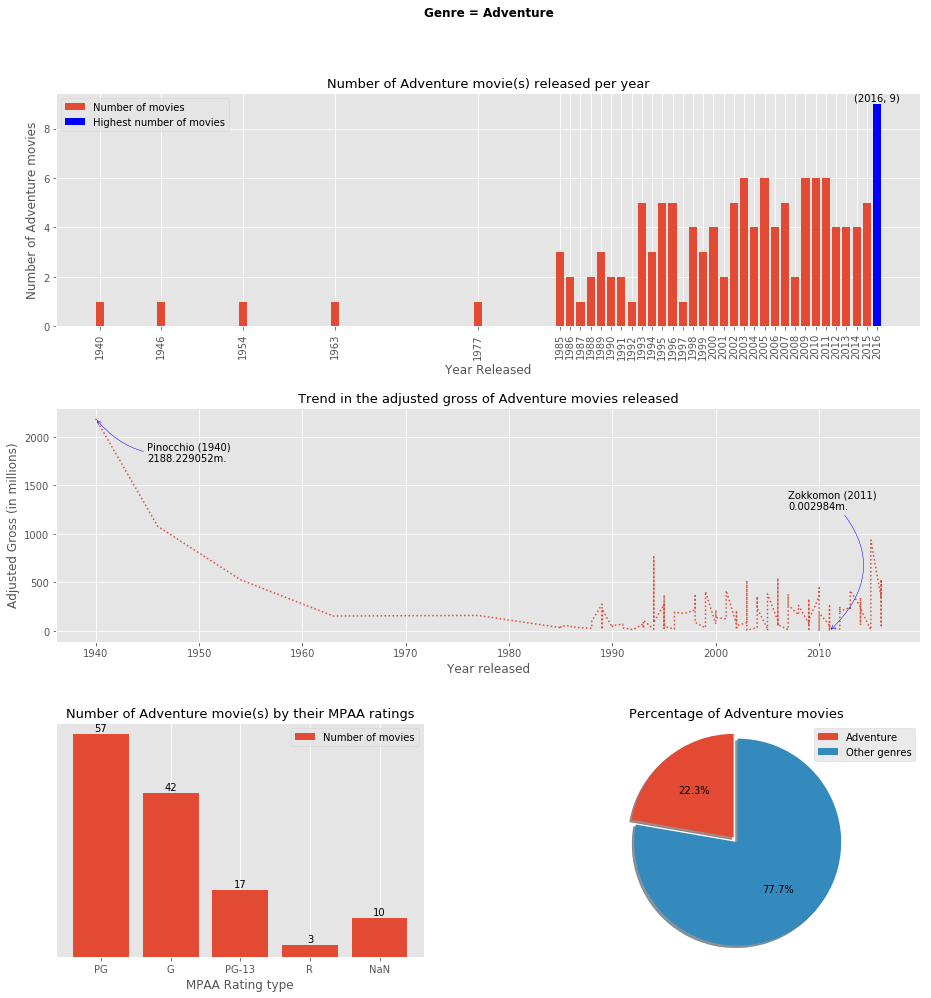

In [24]:
plt.figure(figsize=(20,15))

plot1 = plt.subplot2grid((3,2), (0,0), colspan=2, rowspan=1)
label = ['Number of movies', 'Highest number of movies']
plt.bar(adventure_movie_counts['release_year'], adventure_movie_counts['num_of_adventure_movies'])
index_max_adventure = adventure_movie_counts['num_of_adventure_movies'].idxmax()
plt.bar(adventure_movie_counts.at[index_max_adventure, 'release_year'], adventure_movie_counts.at[index_max_adventure, 'num_of_adventure_movies'], color='blue')
plt.xlabel('Year Released')
plt.ylabel('Number of Adventure movies')
plt.legend(label, loc=2, shadow=False)
plt.xticks(adventure_movie_counts['release_year'], rotation=90, fontsize=10)
annotation_format_adv = '({}, {})'.format(adventure_movie_counts.at[index_max_adventure, 'release_year'], adventure_movie_counts.at[index_max_adventure, 'num_of_adventure_movies'])
plt.annotate(annotation_format_adv, (adventure_movie_counts.at[index_max_adventure, 'release_year'], adventure_movie_counts.at[index_max_adventure, 'num_of_adventure_movies']), textcoords='offset points', xytext=(0,3), ha='center')
plt.title('Number of Adventure movie(s) released per year', fontsize=13)

plot2 = plt.subplot2grid((3,2), (1,0), colspan=2, rowspan=1)
plt.plot(adventure_df['release_year'], adventure_df['adjusted_gross_millions'], ':')
plt.xlabel('Year released')
plt.ylabel('Adjusted Gross (in millions)')
index_adv_max = adventure_df['adjusted_gross_millions'].idxmax()
index_adv_min = adventure_df['adjusted_gross_millions'].idxmin()
annotation_adv_max_format = '{} ({})\n{}m.'.format(adventure_df.at[index_adv_max, 'movie_title'], adventure_df.at[index_adv_max, 'release_year'], adventure_df.at[index_adv_max, 'adjusted_gross_millions'])
annotation_adv_min_format = '{} ({})\n{}m.'.format(adventure_df.at[index_adv_min, 'movie_title'], adventure_df.at[index_adv_min, 'release_year'], adventure_df.at[index_adv_min, 'adjusted_gross_millions'])
plt.annotate(annotation_adv_max_format, xy=(adventure_df.at[index_adv_max, 'release_year'], adventure_df.at[index_adv_max, 'adjusted_gross_millions']), xytext=(1945, 1750), arrowprops=dict(arrowstyle='->', color='blue', connectionstyle='arc3,rad=-0.3'))
plt.annotate(annotation_adv_min_format, xy=(adventure_df.at[index_adv_min, 'release_year'], adventure_df.at[index_adv_min, 'adjusted_gross_millions']), xytext=(2007, 1250), arrowprops=dict(arrowstyle='->', color='blue', connectionstyle='arc3,rad=-0.5'))
plt.title('Trend in the adjusted gross of Adventure movies released', fontsize=13)

plot3 = plt.subplot2grid((3,2), (2,0), colspan=1, rowspan=1)
plt.bar(adventure_movie_rating_count['mpaa_rating'], adventure_movie_rating_count['count'])
plt.xlabel('MPAA Rating type')
plt.gca().get_yaxis().set_visible(False)
for rating, count in zip(adventure_movie_rating_count['mpaa_rating'], adventure_movie_rating_count['count']):
    annotation_format = '{}'.format(count)
    plt.annotate(annotation_format, xy=(rating, count), textcoords='offset points', xytext=(0,3), ha='center')
label = ['Number of movies']
plt.legend(label, loc=0)
plt.title('Number of Adventure movie(s) by their MPAA ratings', fontsize=13)

plot4 = plt.subplot2grid((3,2), (2,1), colspan=1, rowspan=1)
labels = ['Adventure', 'Other genres']
sizes = [len(adventure_df), len(movie_df)-len(adventure_df)]
explode = (0.06, 0)
plt.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(labels, loc=0)
plt.axis('equal')
plt.title('Percentage of Adventure movies', fontsize=13)

plt.subplots_adjust(top=0.90, bottom=0.10, left=0.20, right=0.80, hspace=0.35, wspace=0.35)
plt.suptitle('Genre = Adventure', fontweight='bold')
plt.show()

**Observations made from the Adventure Genre visualizations:**

- More Adventure movies were released in the 1980-2016 period compared to the 1940-1980 period. From the visualization, we can say that viewers can expect more from the Adventure genre in the future (since we can see a sharp increasing trend in the number of adventure movies released per year which may mean that viewers might have liked adventure movies)
- *Pinocchio* is the highest grossing adventure movie released in 1940 with a collection of about 2188.23 million dollars.
- *Zokkomon* is lowest grossing adventure movie released in 2011 with a collection of about 2984 dollars.
- Most of the adventure movies can we viewed by children below the age of 13.
- Adventure genre comprises of about 22.3% of all Disney movies. 

***Drama Genre***

In [25]:
drama_df = genre_group.get_group('Drama')
drama_df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,adjusted_gross_millions,release_year
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,920.608730,1950
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515,1236.035515,1955
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832,21.505832,1959
27,Amy,1981-03-20,Drama,NaN,0,0,0.000000,1981
30,Night Crossing,1982-02-05,Drama,NaN,4500000,12903059,12.903059,1982
32,Tex,1982-11-19,Drama,NaN,7199408,20643199,20.643199,1982
35,Never Cry Wolf,1983-10-07,Drama,NaN,27668764,70669955,70.669955,1983
36,Running Brave,1983-11-04,Drama,NaN,1204595,3223725,3.223725,1983
38,Country,1984-09-29,Drama,NaN,8400000,21075000,21.075000,1984
43,The Journey of Natty Gann,1985-09-27,Drama,NaN,9468512,22302956,22.302956,1985


Number of Drama movies

In [26]:
len(drama_df)

114

Next we'll group our Drama data by `release_year`

In [27]:
drama_movie_counts = drama_df['release_year'].value_counts().to_frame().reset_index(drop=False).rename(columns={'index':'release_year','release_year':'num_of_drama_movies'}).sort_values(by='release_year', ascending=True)
drama_movie_counts

,release_year,num_of_drama_movies
37,1950,1
36,1955,1
35,1959,1
34,1981,1
22,1982,2
21,1983,2
32,1984,1
20,1985,2
31,1986,1
13,1988,3


Let's now find out the types of MPAA ratings given to the drama movies and their counts

In [28]:
drama_movie_rating_count = drama_df['mpaa_rating'].value_counts().to_frame().reset_index(drop=False).rename(columns={'index':'mpaa_rating','mpaa_rating':'count'})
drama_movie_rating_count_nan = drama_df['mpaa_rating'].isna().sum()
drama_movie_rating_count.loc[len(drama_movie_rating_count.index)] = ['NaN', drama_movie_rating_count_nan]
drama_movie_rating_count

,mpaa_rating,count
0,PG-13,37
1,R,33
2,PG,28
3,G,5
4,NaN,11


Let's visualize the drama movies data

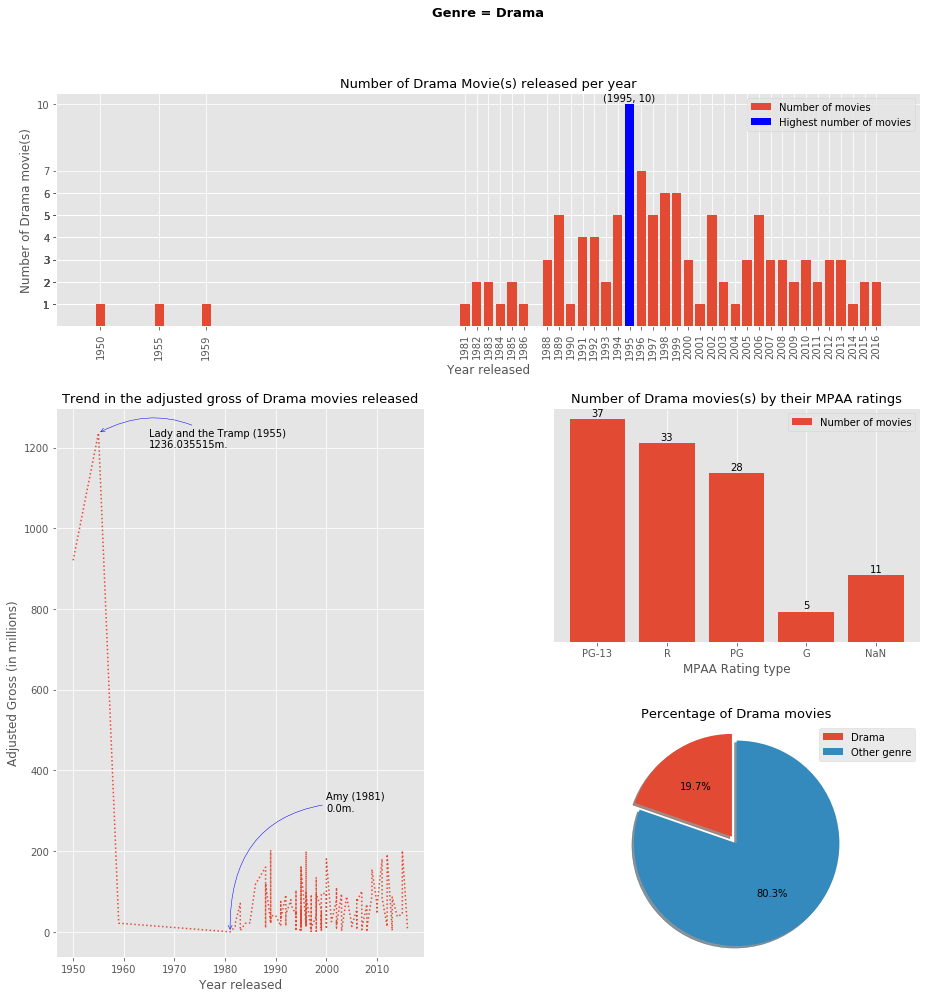

In [29]:
plt.figure(figsize=(20,15))
plt.suptitle('Genre = Drama', fontweight='bold', fontsize=13)
plt.subplots_adjust(top=0.90, bottom=0.10, left=0.20, right=0.80, hspace=0.35, wspace=0.35)

plt.subplot2grid((3,2), (0,0), colspan=2, rowspan=1)
plt.bar(drama_movie_counts['release_year'], drama_movie_counts['num_of_drama_movies'])
index_max_drama = drama_movie_counts['num_of_drama_movies'].idxmax()
plt.bar(drama_movie_counts.at[index_max_drama, 'release_year'], drama_movie_counts.at[index_max_drama, 'num_of_drama_movies'], color='blue')
plt.xlabel('Year released')
plt.ylabel('Number of Drama movie(s)')
plt.xticks(drama_movie_counts['release_year'], rotation=90)
plt.yticks(drama_movie_counts['num_of_drama_movies'])
label = ['Number of movies', 'Highest number of movies']
plt.legend(label, loc=0, shadow=False)
annotation_format_drama = '({}, {})'.format(drama_movie_counts.at[index_max_drama, 'release_year'], drama_movie_counts.at[index_max_drama, 'num_of_drama_movies'])
plt.annotate(annotation_format_drama, xy=(drama_movie_counts.at[index_max_drama, 'release_year'], drama_movie_counts.at[index_max_drama, 'num_of_drama_movies']), textcoords='offset points', xytext=(0,3), ha='center')
plt.title('Number of Drama Movie(s) released per year', fontsize=13)

plt.subplot2grid((3,2), (1,0), colspan=1, rowspan=2)
plt.plot(drama_df['release_year'], drama_df['adjusted_gross_millions'], ':')
plt.xlabel('Year released')
plt.ylabel('Adjusted Gross (in millions)')
index_drama_min = drama_df['adjusted_gross_millions'].idxmin()
index_drama_max = drama_df['adjusted_gross_millions'].idxmax()
annotation_drama_min_format = '{} ({})\n{}m.'.format(drama_df.at[index_drama_min, 'movie_title'], drama_df.at[index_drama_min, 'release_year'], drama_df.at[index_drama_min, 'adjusted_gross_millions'])
annotation_drama_max_format = '{} ({})\n{}m.'.format(drama_df.at[index_drama_max, 'movie_title'], drama_df.at[index_drama_max, 'release_year'], drama_df.at[index_drama_max, 'adjusted_gross_millions'])
plt.annotate(annotation_drama_min_format, xy=(drama_df.at[index_drama_min, 'release_year'], drama_df.at[index_drama_min, 'adjusted_gross_millions']), xytext=(2000, 300), arrowprops=dict(arrowstyle='->', color='blue', connectionstyle='arc3,rad=0.5'))
plt.annotate(annotation_drama_max_format, xy=(drama_df.at[index_drama_max, 'release_year'], drama_df.at[index_drama_max, 'adjusted_gross_millions']), xytext=(1965, 1200), arrowprops=dict(arrowstyle='->', color='blue', connectionstyle='arc3,rad=0.3'))
plt.title('Trend in the adjusted gross of Drama movies released', fontsize=13)

plt.subplot2grid((3,2), (1,1), colspan=1, rowspan=1)
plt.bar(drama_movie_rating_count['mpaa_rating'], drama_movie_rating_count['count'])
plt.gca().get_yaxis().set_visible(False)
plt.xlabel('MPAA Rating type')
label = ['Number of movies']
plt.legend(label, loc=0, shadow=False)
for rating, count in zip(drama_movie_rating_count['mpaa_rating'], drama_movie_rating_count['count']):
    annotation_drama_rating_format = '{}'.format(count)
    plt.annotate(annotation_drama_rating_format, xy=(rating, count), textcoords='offset points', xytext=(0,3), ha='center')
plt.title('Number of Drama movies(s) by their MPAA ratings', fontsize=13)
    
plt.subplot2grid((3,2), (2,1), colspan=1, rowspan=1)
labels = ['Drama', 'Other genre']
sizes = [len(drama_df), len(movie_df)-len(drama_df)]
explode = (0.05, 0.03)
plt.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(labels, loc=0)
plt.axis('equal')
plt.title('Percentage of Drama movies', fontsize=13)

plt.show()

**Observations made from the Adventure Genre visualizations:**

- Only 3 drama genre movies were released between the years 1950-1980.
- A total of 10 drama genre movies were released in 1995, which is the highest compared to any other year in the drama genre.
- *Lady and the Tramp* is the highest grossing drama movie released in the 1955 with a collection of about 1236 million dollars.
- According to the dataset, *Amy* has no gross collection which might be an error data entry in the dataset.
- Drama genre has very few movies for the general audiences.
- Drama genre comprises of about 19.7% of all Disney movies. 

**Total Inflation Adjusted Gross Collection**

Let's find out total gross collection for each genre

In [30]:
genres = list(movie_df['genre'].dropna().unique())
columns = ['genre', 'num_movies', 'total_gross']
gross_coll_df = pd.DataFrame(columns=columns)
gross_coll_df

,genre,num_movies,total_gross


In [31]:
for genre in genres:
    if genre not in gross_coll_df['genre']:
        gross_coll_df.loc[len(gross_coll_df)] = [genre, len(movie_df[movie_df['genre']==genre]), movie_df[movie_df['genre']==genre]['inflation_adjusted_gross'].sum()]
    else:
        pass

In [32]:
gross_coll_df.sort_values(by='total_gross', ascending=False)

,genre,num_movies,total_gross
1,Adventure,129,24561266158
3,Comedy,182,15409526913
0,Musical,16,9657565776
2,Drama,114,8195804484
4,Action,40,5498936786
7,Thriller/Suspense,24,2151690954
6,Romantic Comedy,23,1788872933
8,Western,7,516709946
10,Documentary,16,203488418
9,Black Comedy,3,156730475


**The above dataframe reveals interesting facts:**

- The *Comedy* genre has the highest number of movies released but it has the second highest total gross value.
- The *Musical* genre has just 16 released movies but it has the third highest total gross value.

**Conclusion**

Out of the 12 movie genres, the *Adventure*, *Comedy*, *Drama* and *Musical* have shown great growth in terms of number of movies released and total gross collection. 